In [3]:
## import necessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [27]:
df=pd.read_csv(r'C:\Users\RB\Desktop\product_sales.csv')
print(df.nunique())
print(df.describe())
print(df.info())

week                     6
sales_method             5
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       42
nb_site_visits          27
state                   50
dtype: int64
               week       nb_sold       revenue  years_as_customer  \
count  15000.000000  15000.000000  13926.000000       15000.000000   
mean       3.098267     10.084667     93.934943           4.965933   
std        1.656420      1.812213     47.435312           5.044952   
min        1.000000      7.000000     32.540000           0.000000   
25%        2.000000      9.000000     52.470000           1.000000   
50%        3.000000     10.000000     89.500000           3.000000   
75%        5.000000     11.000000    107.327500           7.000000   
max        6.000000     16.000000    238.320000          63.000000   

       nb_site_visits  
count    15000.000000  
mean        24.990867  
std          3.500914  
min         12.000000  
25%         23.00000

In [29]:
# 1st cleaning process of sales_method column containing 5 unique values (Email, Call, Email + call, email and em + call)
# instead of 3 unique values(Email, Call and Email + call)

# step1: capitalize string in the sales_method_column
df['sales_method']=df['sales_method'].str.capitalize()

# step2: replace 'Em + call' with 'Email + call' in order to get just 3 unique sales method
df.replace(to_replace='Em + call',value='Email + call',inplace=True)
print(df.nunique())

week                     6
sales_method             3
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       42
nb_site_visits          27
state                   50
dtype: int64


In [30]:
#2nd cleaning process, replace all missing values in the revenue column with average revenue depending on sale_method it falls under
method_dict=df.groupby('sales_method')['revenue'].mean().to_dict()
print(method_dict)
df['revenue'].fillna(df['sales_method'].map(method_dict), inplace=True)
df['revenue']=df['revenue'].round(2)
print(df.info())

{'Call': 47.59746705710102, 'Email': 97.12768419531926, 'Email + call': 183.651232568601}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


In [25]:
#3rd cleaning process, excluding rows where nb_years_customer is greater than 39 years since the company 
# was founded in 1984 which is less than 39 years
df=df[~(df['years_as_customer']>39)]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               14998 non-null  int64  
 1   sales_method       14998 non-null  object 
 2   customer_id        14998 non-null  object 
 3   nb_sold            14998 non-null  int64  
 4   revenue            14998 non-null  float64
 5   years_as_customer  14998 non-null  int64  
 6   nb_site_visits     14998 non-null  int64  
 7   state              14998 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.0+ MB
None


   sales_method    revenue
0          Call  236128.62
1         Email  725062.39
2  Email + call  472351.17


Text(0, 0.5, '')

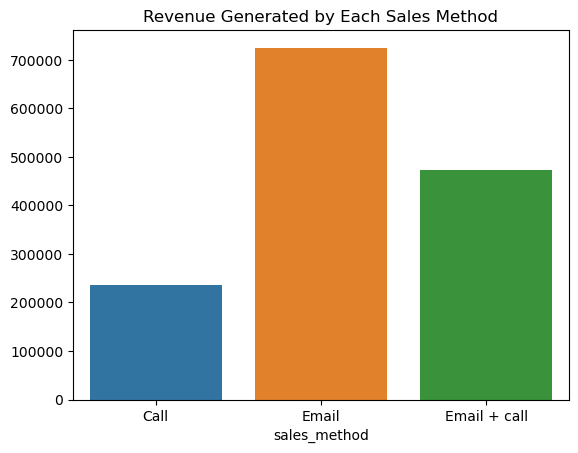

In [15]:
# plotting a bar chart showing the revenue generated per each sales_method
revenue_per_salesmethod=df.groupby('sales_method')['revenue'].sum().reset_index()
print(revenue_per_salesmethod)
sns.barplot(data=revenue_per_salesmethod,x='sales_method',y='revenue')
plt.title("Revenue Generated by Each Sales Method")
plt.xticks(rotation=0)
plt.ylabel("")


   sales_method  customer_id
0          Call         4961
1         Email         7465
2  Email + call         2572


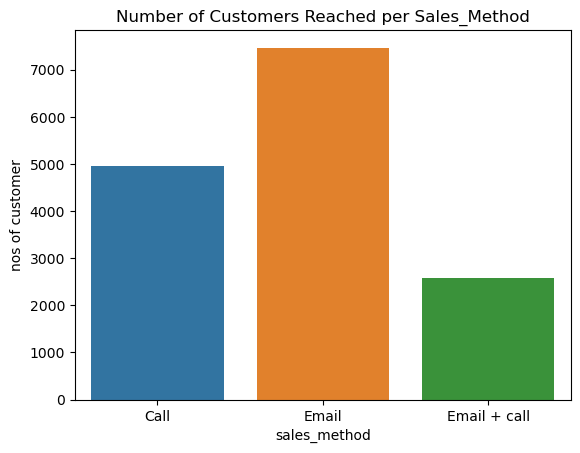

In [16]:
# plotting a bar chart to show number of customers per sales method
cust_per_salesmtd=(df.groupby('sales_method')['customer_id'].count()).reset_index()
print(cust_per_salesmtd)
sns.barplot(data=cust_per_salesmtd,x='sales_method',y='customer_id')
plt.title('Number of Customers Reached per Sales_Method')
plt.ylabel('nos of customer')
plt.show()

Text(0.5, 1.0, 'Overall Revenue Distribution')

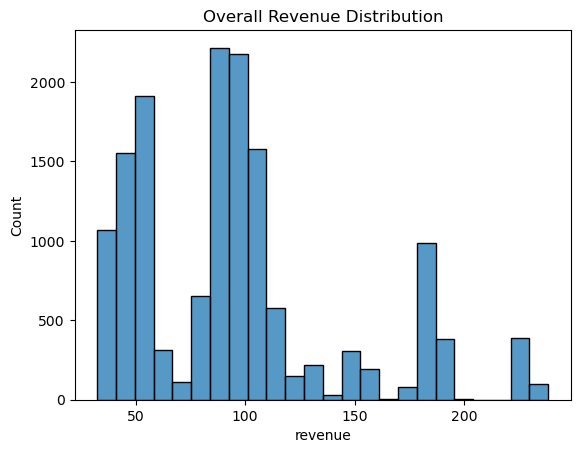

In [33]:
# plotting a histogram to visualize the overal revenue distribution
sns.histplot(data=df,x='revenue',bins=24)
plt.title('Overall Revenue Distribution')

Text(0.5, 1.0, 'Revenue Distribution per Sales_method')

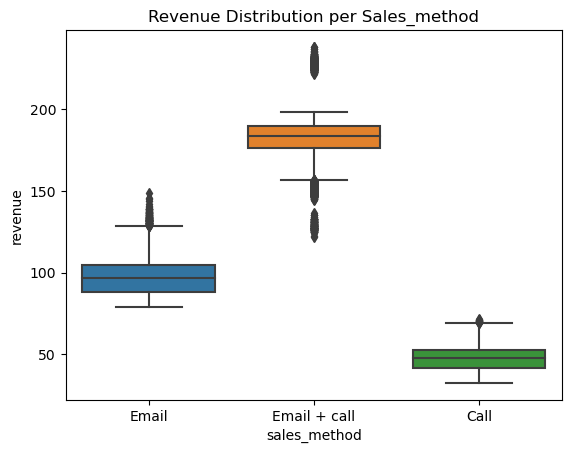

In [18]:
# plotting a boxplot to show the distribution of revenues for each sales_method
sns.boxplot(data=df,x='sales_method',y='revenue')
plt.title('Revenue Distribution per Sales_method')

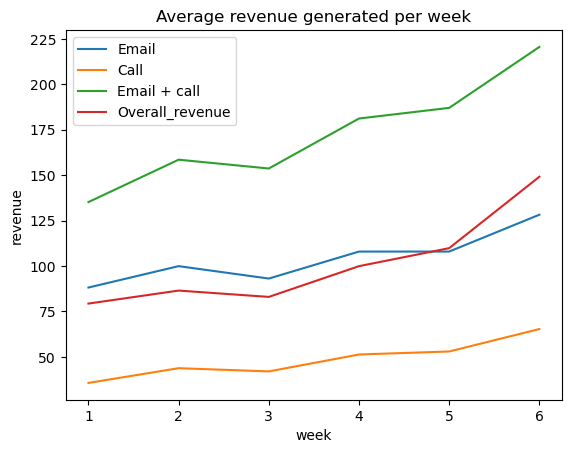

In [32]:
# plotting a line graph to observe the change in average revenue generated by each sales over six weeks
# compared with the overall average revenue generated in six weeks 
dfemail=df[df['sales_method']=='Email'].groupby('week')['revenue'].mean().reset_index()

dfcall=df[df['sales_method']=='Call'].groupby('week')['revenue'].mean().reset_index()

dfemailcall=df[df['sales_method']=='Email + call'].groupby('week')['revenue'].mean().reset_index()

dfoverall=df.groupby('week')['revenue'].mean().reset_index()

sns.lineplot(data=dfemail,x='week',y='revenue',label='Email')
sns.lineplot(data=dfcall,x='week',y='revenue',label='Call')
sns.lineplot(data=dfemailcall,x='week',y='revenue',label='Email + call')
sns.lineplot(data=dfoverall,x='week',y='revenue',label='Overall_revenue')
plt.title('Average revenue generated per week')
plt.legend()

In [ ]:
# copy link below to access the powerpoint presentation of this project.
# https://docs.google.com/presentation/d/1ySOjuGiCxb6I_rq24qyw4TFh1R2O8c44/edit?usp=drive_link&ouid=114792326611673413769&rtpof=true&sd=true